### **Content License Agreement**

<font color='red'><b>**WARNING**</b></font> : 본 자료는 삼성청년SW·AI아카데미의 컨텐츠 자산으로, 보안서약서에 의거하여 어떠한 사유로도 임의로 복사, 촬영, 녹음, 복제, 보관, 전송하거나 허가 받지 않은 저장매체를 이용한 보관, 제3자에게 누설, 공개 또는 사용하는 등의 무단 사용 및 불법 배포 시 법적 조치를 받을 수 있습니다.

# **Objectives**

1. 과제 개요
  - 본 과제는 이미지 파운데이션 모델(Image Foundation Models)의 활용과 비교를 중심으로 Text-to-Image 생성, CLIP 기반 이미지 평가, CNN 기반 모델(ResNet) 비교, 생성 데이터로 ResNet18 Fine-tuning 의 전체 워크플로우를 직접 구현하는 것을 목표로 합니다.

2. 과제 진행 목적 및 배경
  - 파운데이션 모델 응용: Stable Diffusion, CLIP, ResNet 등 다양한 사전 학습 모델을 활용하여, 실습에서 배운 개념을 **'클래식 자동차'**라는 새로운 주제에 적용합니다.
  - 멀티모달 평가 구현: 텍스트와 이미지를 함께 다루는 CLIP 모델을 활용하여, **복합적인 상황(객체, 배경, 분위기)을 묘사한** 이미지의 의미적 적합성을 주도적으로 평가합니다.
  - 전이 학습(Transfer Learning)과 데이터셋 구축: Stable Diffusion으로 **객체의 특정 '상태'(새것 vs 낡음)를 표현하는** 이미지 데이터셋을 직접 구축하고, 이를 ResNet18 모델 학습에 활용하여 생성 데이터의 가치를 탐구하고 데이터셋 구축 능력을 기릅니다.
  - 모델 비교 분석 능력 심화: CLIP과 전통 CNN의 분류 결과를 다른 예시에서 비교하여 모델 특성과 성능 차이에 대한 이해를 공고히 합니다.

3. 과제 수행으로 얻어갈 수 있는 역량
  - 프롬프트 엔지니어링: 특정 컨셉(예: 해안 도로를 달리는 클래식 카)을 구현하기 위한 효과적인 positive/negative prompt 작성 능력.
  - 멀티모달 평가:
    - CLIP을 사용하여 이미지와 직접 정의한 텍스트 레이블 간 유사도를 측정하고 해석하는 기술.
    - CLIP 모델과 ResNet 모델의 결과를 비판적으로 비교 분석하는 능력.
  - CNN 활용 능력: ResNet 계열 모델을 불러와 전이 학습 및 Fine-tuning을 처음부터 구현하는 능력.
  - 데이터 생성 및 확장 전략: **특정 상태(condition) 분류** 목적에 맞는 합성 데이터셋을 직접 제작하고 활용하는 전략 수립 능력.


4. 과제 핵심 내용
  - HuggingFace Stable Diffusion 모델로 **'해안 도로의 클래식 자동차'** 컨셉 이미지 생성
  - CLIP 모델로 생성된 자동차 이미지와 **시대, 스타일, 배경을 포함한 텍스트 레이블** 간의 의미적 유사도 평가
  - ResNet-50으로 동일 이미지를 분류한 후 CLIP의 결과와 비교 분석
  - Stable Diffusion으로 **'새 차'와 '녹슨 폐차'** 합성 데이터셋을 직접 생성하여 ResNet-18 미세조정 (Fine-Tuning) 구현

# **Prerequisites**

**꼭 맞춰주세요!!!!**
```
pytorch : 2.7.1
torchvision: 0.22.1
transformers:  4.55.1
datasets:  4.0.0
```

실습과 동일하게 아래 라이브러리들이 필요합니다. 설치되어 있지 않다면 셀을 실행하여 설치해주세요.
```bash
!pip install torch torchvision diffusers transformers accelerate
```


# **Assignment Overview**

### **들어가며: 파운데이션 모델 (Foundation Model) 복습**

대규모 데이터로 사전 학습된 범용 인공지능 모델로, 다양한 다운스트림 태스크에 전이하여 효율적으로 사용할 수 있습니다. 이번 과제에서는 실습에서 다룬 Stable Diffusion, CLIP, ResNet을 다시 한번 활용하여 새로운 문제를 해결합니다.

### **과제 목차**

이 노트북은 네 가지 주요 파트로 구성되어 있습니다.

1.  **Stable Diffusion 모델로 컨셉 이미지 생성**: '해질녘 해안 도로를 달리는 1960년대 빨간색 컨버터블'을 주제로 사실적인 사진 스타일의 이미지를 생성합니다.
2.  **CLIP 모델로 생성 이미지 평가**: 생성된 자동차 이미지가 의도한 컨셉(객체, 시대, 배경)과 얼마나 부합하는지 텍스트 레이블을 직접 만들어 평가합니다.
3.  **ResNet-50으로 동일 이미지 분류 후 결과 비교**: 전통적인 CNN 모델인 ResNet-50의 분류 결과와 CLIP의 평가 결과를 비교하며 두 모델의 장단점을 분석합니다.
4.  **합성 데이터셋으로 ResNet-18 미세조정**: Stable Diffusion으로 **'새 차'**와 **'녹슨 폐차'** 클래스 데이터셋을 직접 구축하고, 이를 이용해 ResNet-18 모델을 Fine-tuning하여 자동차의 상태를 분류하는 모델을 만듭니다.

먼저 과제 전체의 재현성을 위하여 PyTorch, NumPy, 그리고 Python의 random 모듈에 대한 시드를 설정합니다.

In [ ]:
!pip install --upgrade torch==2.7.1 torchvision==0.22.1 diffusers==0.31.0 transformers==4.45.2 accelerate==0.34.2 safetensors==0.4.5

In [ ]:
import numpy as np
import random
import torch

torch.manual_seed(42)
torch.cuda.manual_seed(42)
np.random.seed(42)
random.seed(42)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

## **0. Huggingface Inference API 활용 이미지 생성**

HuggingFace의 Inference API를 사용하여 별도의 모델 구동 없이 이미지를 생성합니다. 개인용 Read API 키 발급에 문제가 있다면, 진행하지 않으셔도 좋습니다.
이후 설명 될 Pipeline에 비해 사용 난이도가 낮고 별도의 뉴럴네트워크를 직접 구동하지 않아 GPU 연산을 필요로 하지 않지만, 제어할 수 있는 부분이 적어 여러가지 커스터마이징이 어렵습니다.

Hugging face 사이트에서 로그인 후 https://huggingface.co/settings/tokens
접속 후 모든걸 체크한 후 발급하면 됩니다.

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


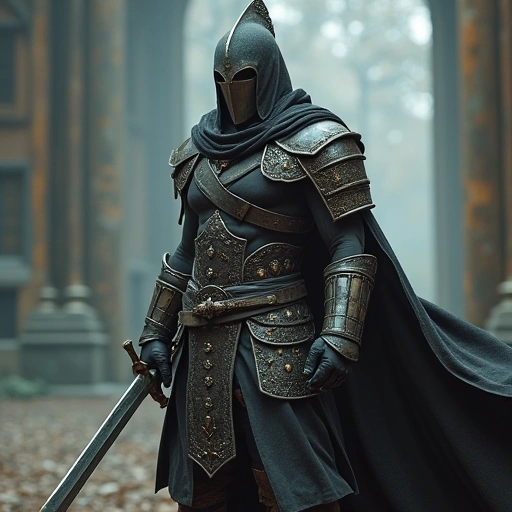

In [ ]:
from huggingface_hub import InferenceClient
import huggingface_hub

#https://huggingface.co/settings/tokens 에서 Read 권한으로 Token을 발급받고, 해당 토큰을 아래에 넣어주세요.
api_key = 'hf_허깅키'
prompt = 'A legendary swordsman holding his sword.'
client = InferenceClient(
    provider="nebius",
    api_key=api_key,
)


# output is a PIL.Image object
image = client.text_to_image(
    prompt,
    model="black-forest-labs/FLUX.1-dev",
)
display(image)


## **1. 텍스트-투-이미지 생성**

HuggingFace의 `diffusers` 라이브러리를 사용하여 Stable Diffusion 파이프라인을 로드하고, **'해안 도로의 클래식 카'**를 주제로 이미지를 생성합니다.
 - **Positive Prompt**: 생성하고 싶은 이미지(자동차 모델/시대, 색상, 배경, 분위기 등)를 상세히 기술합니다.
 - **Negative Prompt**: 생성 이미지에서 제외하고 싶은 요소(예: 만화 스타일, 흐릿함, 왜곡 등)를 기술합니다.

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
from IPython.display import display

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("사용 중인 장치:", device)

model_id = "runwayml/stable-diffusion-v1-5"
# 문제 1
# [TODO] Stable Diffusion 파이프라인을 로드하고 GPU로 이동시키는 코드를 작성하세요.
# 힌트: from_pretrained 메소드를 사용하고, 메모리 효율을 위해 torch_dtype을 float16으로 설정합니다.
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to(device)
# 문제 2
# [TODO] '해질녘 해안 도로를 달리는 1960년대 빨간색 컨버터블'을 주제로 positive와 negative 프롬프트를 작성하세요.
# 힌트: 'photorealistic', '1960s', 'convertible', 'coastal road', 'sunset' 등의 키워드를 positive에 활용해 보세요.
positive_prompt = "photorealistic photo of a red 1960s convertible sports car driving on a coastal road during sunset, cinematic lighting, high detail"
negative_prompt = "cartoon, drawing, sketch, blurry, low quality, deformed, text, watermark, modern car"
# 문제 3
# [TODO] 위에서 작성한 프롬프트를 사용하여 이미지를 4장 생성하는 코드를 작성하세요.
# 힌트: pipe 객체를 호출하며, guidance_scale, num_inference_steps, num_images_per_prompt 인자를 설정합니다.
result = pipe(
    positive_prompt,
    negative_prompt=negative_prompt,
    guidance_scale=8.5,
    num_inference_steps=50,
    num_images_per_prompt=4
)
images = result.images

print("--- 생성된 이미지 --- ")
for i, img in enumerate(images):
    img.save(f"generated_car_image_{i}.png")
    display(img)

Output hidden; open in https://colab.research.google.com to view.

## **2. CLIP 모델을 사용한 생성 이미지 평가**

방금 생성한 이미지 중 하나가 여러분이 의도한 컨셉과 얼마나 잘 부합하는지 CLIP 모델로 평가합니다. 생성된 '클래식 카' 이미지를 올바르게 설명하는 **정답 레이블**과, **시대/스타일/배경**이 다른 **오답 레이블**들을 직접 정의하여 모델의 이해도를 확인합니다.

In [ ]:
from PIL import Image
from transformers import CLIPProcessor, CLIPModel

image = Image.open("generated_car_image_0.png")

# 문제 5
# [TODO] 생성된 이미지를 평가하기 위한 텍스트 레이블을 작성하세요.
# 힌트: 정답(1960년대, 컨버터블, 해안도로), 오답(다른 시대, 다른 차종, 다른 스타일, 다른 배경)을 포함하여 4개 이상의 레이블을 만드세요.
labels = [
    "a photo of a 1960s red convertible on a coastal road", # 정답
    "a photo of a modern red sedan in a city",              # 오답 1: 다른 시대, 차종, 배경
    "a sketch of a classic red car",                        # 오답 2: 다른 스타일
    "a photo of a red convertible in a forest"              # 오답 3: 다른 배경
]
# 문제 5
# [TODO] CLIP 모델과 프로세서를 로드하는 코드를 작성하세요.
# 힌트: 모델 ID는 'openai/clip-vit-base-patch32' 입니다. processor와 model을 모두 로드해야 합니다.
clip_model_id = "openai/clip-vit-base-patch32"
processor = CLIPProcessor.from_pretrained(clip_model_id)
model_clip = CLIPModel.from_pretrained(clip_model_id).to(device)
# 문제 6
# [TODO] 이미지와 텍스트 레이블을 전처리하는 코드를 작성하세요.
# 힌트: processor를 사용하며, text와 images 인자를 모두 전달하고 결과를 pytorch 텐서로 받습니다.
inputs = processor(text=labels, images=image, return_tensors="pt", padding=True).to(device)
# 문제 7

# [TODO] 전처리된 입력을 CLIP 모델에 통과시켜 유사도 점수(logits)와 확률을 계산하는 코드를 작성하세요.
# 힌트: torch.no_grad() 블록 안에서 모델을 실행하고, 결과에서 logits_per_image를 추출한 뒤 softmax를 적용합니다.
with torch.no_grad():
    outputs = model_clip(**inputs)
    logits_per_image = outputs.logits_per_image
    probs = logits_per_image.softmax(dim=1)

best_idx = logits_per_image.argmax(dim=1).item()
print(f"CLIP 예측 결과: '{labels[best_idx]}' 라벨이 가장 타당하다고 예측되었습니다.")
print("\n--- 각 레이블 별 확률 --- ")
for i, label in enumerate(labels):
    print(f"{label}: {probs[0][i].item():.4f}")

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

CLIP 예측 결과: 'a photo of a 1960s red convertible on a coastal road' 라벨이 가장 타당하다고 예측되었습니다.

--- 각 레이블 별 확률 --- 
a photo of a 1960s red convertible on a coastal road: 0.9964
a photo of a modern red sedan in a city: 0.0000
a sketch of a classic red car: 0.0001
a photo of a red convertible in a forest: 0.0035


## **3. ResNet50 기반 모델과의 결과 비교**

동일한 클래식 카 이미지를 전통적인 CNN 분류 모델인 ResNet-50으로 분류하고, CLIP의 결과와 비교합니다. ResNet-50은 ImageNet 카테고리(예: 'convertible', 'sports car')로 예측할 것입니다. CLIP이 '1960년대', '해안 도로', '해질녘'과 같은 문맥 정보를 이해하는 반면, ResNet-50은 주로 이미지의 핵심 객체 자체에만 집중하여 예측하는 경향이 있습니다. 이 차이를 직접 확인해보세요.

In [ ]:
from torchvision import transforms
from torchvision import models

# 문제 8
# [TODO] ImageNet으로 사전 학습된 ResNet-50 모델을 로드하고, 평가 모드로 설정하는 코드를 작성하세요.
# 힌트: models.resnet50 함수와 weights 인자를 사용합니다. .eval()을 호출해야 합니다.
resnet50 = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2).to(device)
resnet50.eval()

imagenet_classes = models.ResNet50_Weights.IMAGENET1K_V2.meta["categories"]

# 이미지를 ResNet-50에 맞게 전처리하는 코드입니다. (수정 불필요)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
img_tensor = preprocess(image).unsqueeze(0).to(device)

# 문제 9
# [TODO] 전처리된 이미지 텐서로 ResNet-50 예측을 수행하고, 확률 값을 계산하는 코드를 작성하세요.
# 힌트: torch.no_grad() 블록 안에서 모델을 실행하고, 결과에 softmax 함수를 적용합니다.
with torch.no_grad():
    output = resnet50(img_tensor)
    probs_resnet = torch.nn.functional.softmax(output, dim=1)[0]

top5_prob, top5_idx = torch.topk(probs_resnet, 5)

print("--- ResNet-50 Top-5 예측 결과 ---")
for i in range(top5_prob.size(0)):
    class_idx = top5_idx[i].item()
    class_name = imagenet_classes[class_idx]
    probability = top5_prob[i].item()
    print(f"{i+1}. 클래스: {class_name} (인덱스: {class_idx}), 확률: {probability:.4f}")

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 151MB/s]


--- ResNet-50 Top-5 예측 결과 ---
1. 클래스: convertible (인덱스: 511), 확률: 0.4983
2. 클래스: sports car (인덱스: 817), 확률: 0.0415
3. 클래스: promontory (인덱스: 976), 확률: 0.0171
4. 클래스: car wheel (인덱스: 479), 확률: 0.0054
5. 클래스: grille (인덱스: 581), 확률: 0.0040


## **4. 생성한 데이터로 ResNet18 모델 미세조정**

이제 과제의 마지막 단계로, Stable Diffusion을 이용해 **동일한 자동차의 두 가지 다른 '상태'**를 표현하는 합성 데이터셋을 구축합니다. **'아주 깨끗한 새 차 (brand_new)'**와 **'오래되어 녹슨 폐차 (rusty_abandoned)'** 이미지를 각각 생성하여, 자동차의 상태를 분류하는 모델을 Fine-tuning 해봅니다.

In [ ]:
import os
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

# 문제 10
# [TODO] '새 차'와 '녹슨 폐차' 클래스에 대한 프롬프트를 각각 정의하세요.
# 힌트: 'brand new', 'shiny', 'showroom' 등의 키워드와 'rusty', 'abandoned', 'wrecked', 'overgrown' 등의 키워드를 활용하여 상태를 극대화하세요.
classes = {
    "brand_new": "photorealistic photo of a brand new, shiny red sports car in a showroom, perfect condition, glossy paint",
    "rusty_abandoned": "photorealistic photo of an old, rusty, abandoned red sports car in a field, broken windows, overgrown with weeds, wrecked"
}
neg_prompt_ft = "cartoon, drawing, sketch, text, watermark"

# 학습 및 테스트 데이터 폴더 생성
for split in ['train', 'test']:
    for cls in classes.keys():
        os.makedirs(f"data/{split}/{cls}", exist_ok=True)

# 문제 10 - 2
# [TODO] 각 클래스별로 학습 이미지 5장, 테스트 이미지 3장을 생성하는 코드를 작성하세요.
for split in ['train', 'test']:
    num_images = 5 if split == 'train' else 3
    for cls, prompt in classes.items():
        print(f"--- Generating {split} images for {cls}... ---")
        # 힌트: Part 1에서 작성했던 이미지 생성 파이프라인 호출 코드를 활용하세요.
        result = pipe(
            prompt,
            negative_prompt=neg_prompt_ft,
            num_images_per_prompt=num_images,
            guidance_scale=8,
            num_inference_steps=50
        )
        images = result.images
        for i, img in enumerate(images):
            img.save(f"data/{split}/{cls}/{cls}_{split}_{i}.png")
            display(img)

# 데이터셋 및 데이터로더 생성 (수정 불필요)
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
train_dataset = ImageFolder("data/train", transform=train_transforms)
test_dataset = ImageFolder("data/test", transform=test_transforms)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)
print(f"\n총 학습 이미지: {len(train_dataset)}, 총 테스트 이미지: {len(test_dataset)}")
print(f"클래스: {train_dataset.classes}")

Output hidden; open in https://colab.research.google.com to view.

사전학습된 ResNet-18 모델을 불러와 출력층만 새로 정의하여 학습을 진행합니다. 기존의 특징 추출부(convolutional layers)는 가중치를 고정(freeze)하고, 분류기(fully connected layer)만 우리가 만든 '새 차 vs 폐차' 데이터셋으로 학습시킵니다.

In [ ]:
import torch.nn as nn
import torch.optim as optim

model_ft = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)

# 문제 11
# [TODO] ResNet-18 모델의 특징 추출부 가중치를 고정(freeze)하는 코드를 작성하세요.
# 힌트: for 반복문으로 model_ft.parameters()를 순회하며 param.requires_grad를 False로 설정합니다.
for param in model_ft.parameters():
    param.requires_grad = False

# 문제 12
# [TODO] 모델의 마지막 레이어(fc)를 우리 데이터셋의 클래스 수에 맞게 새로운 nn.Linear 레이어로 교체하는 코드를 작성하세요.
# 힌트: model_ft.fc.in_features로 입력 뉴런 수를 가져오고, len(train_dataset.classes)로 출력 뉴런 수를 설정합니다.
num_features = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_features, len(train_dataset.classes))
model_ft = model_ft.to(device)

# 문제 13
# [TODO] 손실 함수(CrossEntropyLoss)와 옵티마이저(SGD)를 정의하는 코드를 작성하세요.
# 힌트: 옵티마이저는 학습할 파라미터로 model_ft.fc.parameters()만 지정해야 합니다.
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_ft.fc.parameters(), lr=0.001, momentum=0.9)

# 문제 14
# [TODO] 10 에포크(epoch) 동안 모델을 학습시키는 전체 학습 루프 코드를 작성하세요.
model_ft.train()
num_epochs = 10 # 데이터셋이 더 복잡할 수 있으므로 에포크를 늘려봅니다.

print("\n--- Fine-tuning 시작 ---")
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # 힌트: 아래는 일반적인 학습 5단계입니다.
        # 1. 기울기 초기화 (optimizer.zero_grad())
        optimizer.zero_grad()
        # 2. 순전파 (outputs = model_ft(inputs))
        outputs = model_ft(inputs)
        # 3. 손실 계산 (loss = criterion(outputs, labels))
        loss = criterion(outputs, labels)
        # 4. 역전파 (loss.backward())
        loss.backward()
        # 5. 가중치 업데이트 (optimizer.step())
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_dataset)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")
print("--- Fine-tuning 완료 ---")

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 122MB/s]



--- Fine-tuning 시작 ---
Epoch 1/10, Loss: 1.0438
Epoch 2/10, Loss: 0.7285
Epoch 3/10, Loss: 0.7861
Epoch 4/10, Loss: 0.4584
Epoch 5/10, Loss: 0.4064
Epoch 6/10, Loss: 0.6057
Epoch 7/10, Loss: 0.9688
Epoch 8/10, Loss: 0.4088
Epoch 9/10, Loss: 0.6384
Epoch 10/10, Loss: 0.1639
--- Fine-tuning 완료 ---


학습이 완료된 모델을 테스트 데이터셋으로 평가하여 자동차의 상태('새 차' vs '녹슨 폐차')를 얼마나 잘 분류하는지 정확도를 확인합니다.

In [ ]:
# 모델 평가 코드 (수정 불필요)
model_ft.eval()
correct = 0
total = 0
print("\n--- 테스트 시작 ---")
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_ft(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # 예측 결과 일부 시각화
        for i in range(inputs.size(0)):
            print(f"예측: {test_dataset.classes[predicted[i]]}, 정답: {test_dataset.classes[labels[i]]}")

print(f'\n테스트 데이터셋에서 모델 정확도: {100 * correct / total:.2f} %')


--- 테스트 시작 ---
예측: brand_new, 정답: brand_new
예측: brand_new, 정답: brand_new
예측: brand_new, 정답: brand_new
예측: rusty_abandoned, 정답: rusty_abandoned
예측: rusty_abandoned, 정답: rusty_abandoned
예측: rusty_abandoned, 정답: rusty_abandoned

테스트 데이터셋에서 모델 정확도: 100.00 %


# **마치며**

이번 과제를 통해 텍스트-투-이미지 생성, CLIP을 이용한 멀티모달 평가, CNN 모델과의 비교, 그리고 생성 데이터를 활용한 Fine-tuning까지 파운데이션 모델 활용의 전 과정을 직접 구현해보았습니다. 특히 단순 객체 분류를 넘어, 객체의 '상태'를 분류하는 모델을 만들며 프롬프트 엔지니어링의 중요성과 생성 데이터의 활용 가능성을 깊이 있게 탐색하는 계기가 되었기를 바랍니다.